In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston

In [45]:
dataset = load_boston()

X = dataset.data
y = dataset.target[:,np.newaxis]

print("Total samples in our dataset is: {}".format(X.shape[0]))
print("Total variables (predictors) in our dataset is: {}".format(X.shape[1]))

Total samples in our dataset is: 506
Total variables (predictors) in our dataset is: 13


In [7]:
def calc_cost(y, x, params):
    '''
    Given parameters/weights/coefficients, this function calculates the cost 
    cost is given as Mean Square Error between actual and predicted values
    '''
    n = len(y)
    hx = (x@params)
    mse = (1/(2*n))*np.sum((hx-y)**2)
    return mse

In [8]:
def gradient_descent(x, y, params, learning_rate, num_iters):
    n = len(y)
    j_history = np.zeros((num_iters, 1))
    for i in range(num_iters):
        dj = (1/n)*(x.T@((x@params)-y))
        params = params - learning_rate*dj
        j_history[i] = calc_cost(y, x, params)
    return (j_history, params)
        

In [9]:
# Normalize X
n = len(y)

mu = np.mean(X,0)
sigma = np.std(X,0)

X = (X-mu)/sigma

X = np.hstack((np.ones((n,1)),X))
n_features = np.size(X,1)
params = np.zeros((n_features,1))

In [10]:
# Perform Gradient Descent
n_iters = 1500
learning_rate = 1e-3

initial_cost = calc_cost(y, X, params)

print("Initial Cost:{0}".format(initial_cost))

Costs, params = gradient_descent(X, y, params, learning_rate, n_iters)

print("Final Parameters: {0}".format(params))

final_cost = calc_cost(y, X, params)

print("Final Cost:{0}".format(final_cost))

Initial Cost:296.0734584980237
Final Parameters: [[17.50882955]
 [-0.59925666]
 [ 0.44475082]
 [-0.51319271]
 [ 0.85890553]
 [-0.46314076]
 [ 2.95449704]
 [-0.19076074]
 [-1.03806353]
 [ 0.18701864]
 [-0.44429382]
 [-1.60024791]
 [ 0.73320519]
 [-2.65133555]]
Final Cost:25.044757271113525


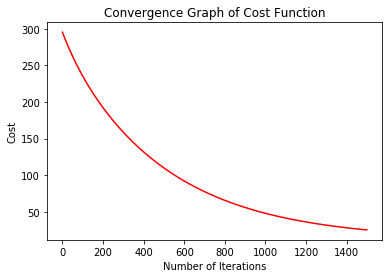

In [11]:
plt.plot(range(len(Costs)), Costs, 'r')

plt.title("Convergence Graph of Cost Function")
plt.xlabel("Number of Iterations")
plt.ylabel("Cost")
plt.show()

### Linear Regression Class

In [56]:
class LinearRegression:
    """
    X.shape = (n,m)
    m: no. of features
    n: no. of examples
    
    Y.shape = (n,1)
    params (coefficients/weights) = (m,1)
    
    y_bar = wX
    J = (y_bar - y)**2
    dJ/dw = 2*(y_bar-y)*X
    """
    
    def __init__(self,):
        self.cost_history = []
        self.parameter = None
        self. X = None
        self.y = None
        pass
    
    def cost(self, y, x, params):
        n = len(y)
        y_bar = x@params
        mse = (1/(2*n))*np.sum((y_bar-y)**2)
        return y_bar, mse
    
    def normalize(self, X):
        mu = np.mean(X,0)
        sigma = np.std(X,0)
        norm_X = (X-mu)/sigma
        return norm_X
    
    def train(self, X, y, learning_rate = 0.01, num_iters = 500):
        self.X = X
        self.y = y
        X = self.normalize(X)
        lr = learning_rate
        n = len(y)
        X = np.concatenate((np.ones((n,1)), X), axis = 1)
        params = np.zeros((X.shape[1], 1))
        
        y_bar, initial_cost = self.cost(y, X, params)
        print('initial cost: {}'.format(initial_cost))
        self.cost_history.append(initial_cost)
        
        # Gradient Descent
        for i in range(num_iters):
            
            #weight updating
            dW = (1/n)*(X.T@((y_bar)-y))
            params -= lr*dW
            
            #forward propogation
            y_bar, iter_cost = self.cost(y, X, params)
            if i%100 == 0:
                print('iteration: {}, cost: {}'.format(i+1, iter_cost))
            self.cost_history.append(iter_cost)
        
        self.parameter = params
            
            
            

In [57]:
X = dataset.data
y = dataset.target[:,np.newaxis]

print("Total samples in our dataset is: {}".format(X.shape[0]))
print("Total variables (predictors) in our dataset is: {}".format(X.shape[1]))

Total samples in our dataset is: 506
Total variables (predictors) in our dataset is: 13


In [58]:
lr = LinearRegression()
lr.train(X, y)

initial cost: 296.0734584980237
iteration: 1, cost: 288.8083019669832
iteration: 101, cost: 46.7810473513814
iteration: 201, cost: 16.44203975910391
iteration: 301, cost: 12.219603832653572
iteration: 401, cost: 11.527526623271092


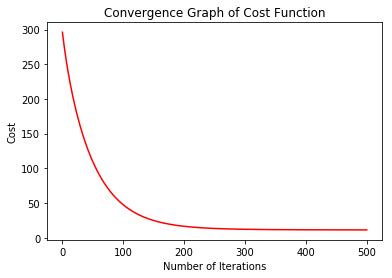

In [59]:
plt.plot(range(len(lr.cost_history)), lr.cost_history, 'r')

plt.title("Convergence Graph of Cost Function")
plt.xlabel("Number of Iterations")
plt.ylabel("Cost")
plt.show()